In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv("B_nw_25day.csv").drop("Unnamed: 0",axis=1)

In [8]:
df.shape

(2438, 2)

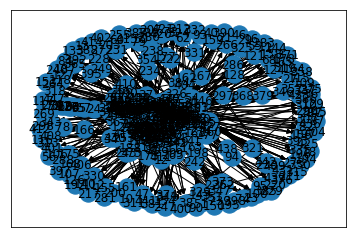

In [9]:
G = nx.DiGraph()  # 有向グラフ (Directed Graph)
list_edge=df
list_edge.loc[0][0]
for i in range(2438):
    G.add_edge(str(list_edge.loc[i][0]),str(list_edge.loc[i][1]))
nx.draw_networkx(G)
plt.show()

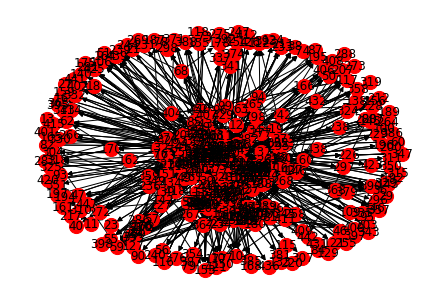

In [10]:
nx.draw_spring(G,node_size=200,node_color='red',with_labels=True)

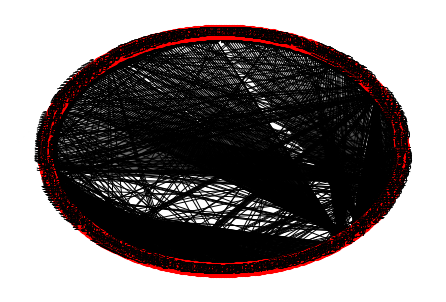

In [14]:
nx.draw_circular(G,node_size=200,node_color='red',with_labels=True)

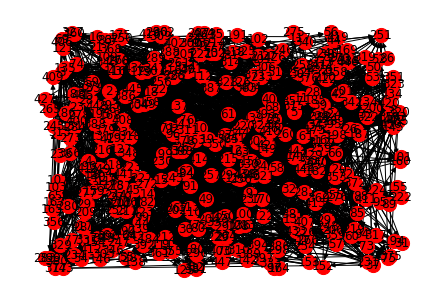

In [15]:
nx.draw_random(G,node_size=200,node_color='red',with_labels=True)

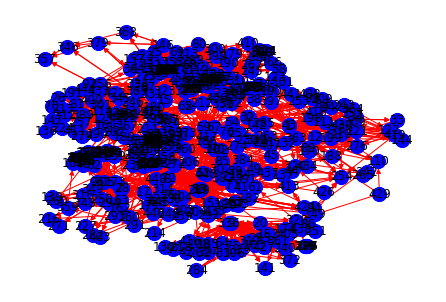

In [16]:
nx.draw_kamada_kawai(G,node_size=200,node_color='blue',edge_color='red',with_labels=True)

In [17]:
nx.number_of_edges(G)

2438

In [18]:
nx.number_of_nodes(G)

429

In [19]:
import matplotlib.colors as mcolors

def draw_h(G, pos, measures, measure_name):    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=list(measures.keys()))
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

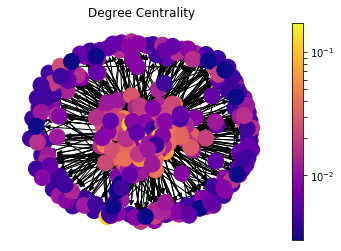

In [20]:
pos = nx.spring_layout(G)
draw_h(G, pos, nx.degree_centrality(G), 'Degree Centrality')
#次数中心性

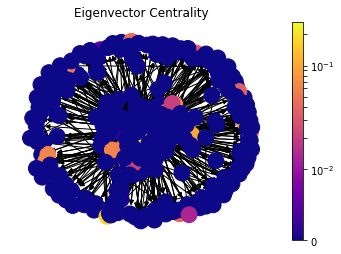

In [21]:
draw_h(G, pos, nx.eigenvector_centrality(G), 'Eigenvector Centrality')
#固有ベクトル中心性

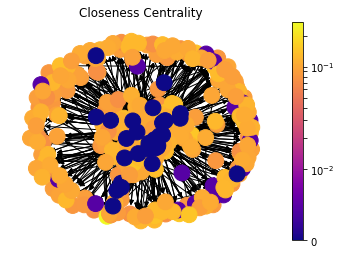

In [22]:
draw_h(G, pos, nx.closeness_centrality(G), 'Closeness Centrality')
#近接中心性

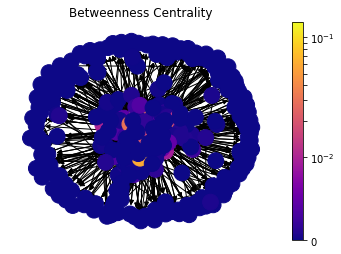

In [23]:
draw_h(G, pos, nx.betweenness_centrality(G), 'Betweenness Centrality')
#媒介中心性

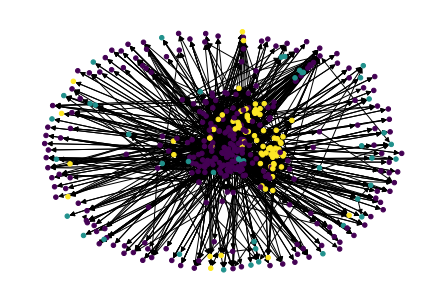

In [28]:
from networkx.algorithms import community
import pandas as pd 

carac = pd.DataFrame({ 'ID':G.nodes(), 'myvalue':[0]*len(G.nodes()) })

communities_generator = community.centrality.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
for m in range(len(next_level_communities)):
  for n in next_level_communities[m]:
    carac.loc[carac.ID == n, 'myvalue'] = m
nx.draw_spring(G, node_color = carac['myvalue'], node_size=20, with_labels=False)


In [29]:
#ネットワークデータの出力

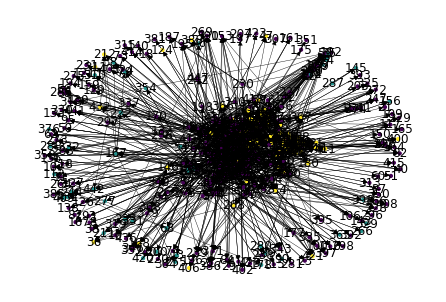

In [31]:
communities_generator = community.centrality.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
for m in range(len(next_level_communities)):
  for n in next_level_communities[m]:
    carac.loc[carac.ID == n, 'myvalue'] = m
nx.draw_spring(G, node_color = carac['myvalue'],fontsize=1,width=0.4, node_size=10, with_labels=True) 
savefn = 'GB.pdf'
plt.savefig(savefn)

In [ ]:
list_edge["0"]==2